## Homework COVID Database
Name: Catherine Nguyen

Date: 05/06/2021

Course: STAT 196K

## Understanding the data

4 pts

1. Pick one of the [limitations described in the data documentation](https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/fb-survey.html#limitations) and elaborate on it.
    What does it mean?
    - The limitation I chose to focus on is `repeat invitations`. What this means is not all surveys are taken from a unique user. There are times when a single sample response/survey may be repeated by a single individual. To combat this Facebook calculates a single day of observations from unique facebook accounts. However, I am aware that people may have multiple facebook accounts and although they are unique it is still the same reponse from one individual. With that said, the observations from one month may have the same respondents in the following month. In conclusion, this does not represent the population well because over a years worth of observations there is a chance that one individual possibly filled out a survey once per month equating to 12 responses. 
    
2. Find a row in the `covid` table that contains SE (standard error) for one signal.
    Use this to construct and interpret a "quick and dirty" 95% confidence interval for that particular signal in that row.
    - For this I went ahead and downloaded a sample of ten obseravtions from signal `smoothed_wtested_positive_14d` and the description for that is 'Estimated test positivity rate (percent) among people tested for COVID-19 in the past 14 days
Earliest date available: 2020-09-08'. Then I will sample one from those ten to interpret a dirty 95% confidence interval. 

In [5]:
import pandas as pd
df = pd.read_csv('1c89fbca-9864-47bb-82e0-abe9acd0faec.csv')
df

,data_source,signal,geo_type,time_value,geo_value,direction,value,stderr,sample_size
0,fb-survey,smoothed_wtested_positive_14d,nation,20200908,us,NaN,9.241718,0.771824,1408.0
1,fb-survey,smoothed_wtested_positive_14d,nation,20200909,us,NaN,8.332986,0.448761,3793.0
2,fb-survey,smoothed_wtested_positive_14d,nation,20200910,us,NaN,8.314355,0.349073,6256.0
3,fb-survey,smoothed_wtested_positive_14d,nation,20200911,us,NaN,8.038652,0.295533,8464.0
4,fb-survey,smoothed_wtested_positive_14d,nation,20200912,us,NaN,8.141680,0.262568,10848.0
5,fb-survey,smoothed_wtested_positive_14d,nation,20200913,us,NaN,7.993034,0.235351,13277.0
6,fb-survey,smoothed_wtested_positive_14d,nation,20200914,us,NaN,8.023101,0.218484,15459.0
7,fb-survey,smoothed_wtested_positive_14d,nation,20200915,us,NaN,8.124394,0.214919,16160.0
8,fb-survey,smoothed_wtested_positive_14d,nation,20200916,us,NaN,8.464481,0.220561,15927.0
9,fb-survey,smoothed_wtested_positive_14d,nation,20200917,us,NaN,8.268172,0.220880,15546.0


In [5]:
#Now to take a sample and calculate the CI at 95% of that sample
sample = df.sample(1)
x = sample.iloc[0]['value']
std = sample.iloc[0]['stderr']
z_score = 1.96
lower = x - (z_score * std)
upper = x + (z_score * std)
print('95% Confidence Interval with known variables \nx: ' + str(x) + '\nstd: ' + str(std) + '\nz-score: ' + str(z_score) + '\nis [' + str(lower) + ', ' + str(upper) + '].')

95% Confidence Interval with known variables 
x: 8.0386522
std: 0.2955333
z-score: 1.96
is [7.459406931999999, 8.617897467999999].


## Counting

8 pts
_Include your answers and show SQL queries for the questions below._

### 1

How many observations are there for each signal in the county level `covid` rows?
County level rows means that `geo_type = 'county'`.
Show the top 5 `signals` with the most counts.

```sql 
SELECT signal, COUNT(*) AS num_obs
FROM covid
WHERE geo_type = 'county'
GROUP BY signal
ORDER BY num_obs DESC
LIMIT 5;
```

In [6]:
# Heres the dataframe from that query
q1 = pd.read_csv('edd31298-2047-4e05-8801-4a411d131978.csv')
q1

,signal,num_obs
0,confirmed_incidence_num,3459570
1,confirmed_cumulative_num,3459570
2,confirmed_cumulative_prop,3422517
3,confirmed_incidence_prop,3422517
4,deaths_cumulative_num,3401785



### 2

How many county level rows does the `covid` table have for each state?
Show the top 5 states with the most counts, including the name of the state.
How many observations does California have?

##### Each State
```sql
SELECT CO.state, COUNT(*) AS num_obs
FROM covid AS C, states AS S, county AS CO
WHERE C.geo_type = 'county' AND  C.geo_value = CO.id2 AND S.state = CO.state 
GROUP BY CO.state
ORDER BY num_obs DESC;
```
##### Top 5
```sql
SELECT CO.state, COUNT(*) AS num_obs
FROM covid AS C, states AS S, county AS CO
WHERE C.geo_type = 'county' AND  C.geo_value = CO.id2 AND S.state = CO.state 
GROUP BY CO.state
ORDER BY num_obs DESC;
LIMIT 5;
```

##### California
```sql
SELECT CO.state, COUNT(*) AS num_obs
FROM covid AS C, county AS CO
WHERE C.geo_type = 'county' AND CAST(C.geo_value AS INT) = CAST(CO.id2 AS INT) AND C.geo_value <> CO.id2 AND CO.state = 'California'
GROUP BY CO.state
ORDER BY num_obs DESC;
```
- I saved each output as a csv, but for california I felt it would be a waste since its has no results. So for that I will instead filter it out from one of the following csvs' to return californias data. 

In [33]:
#Each State query output
each_state = pd.read_csv('1a5e31af-b636-4084-89ad-1d4bf56a774f.csv')
each_state.tail() # shows last 5 in other wordz lowest observations by state

,state,num_obs
39,New Hampshire,369058
40,Rhode Island,197842
41,Hawaii,181290
42,Delaware,129622
43,District of Columbia,45131


In [22]:
# top 5 query output
top5 = pd.read_csv('6b0b4293-03a8-409b-a0f9-6a51aa11f40b.csv')
top5

,state,num_obs
0,Texas,7735787
1,Georgia,4826193
2,Virginia,4123813
3,Kentucky,3548586
4,Missouri,3405331


###### EDIT: THERE ARE SOME FOR CALIFORNIA!
```SQL
SELECT CO.state, COUNT(*) AS num_obs
FROM covid AS C, county AS CO
WHERE C.geo_type = 'county' AND CAST(C.geo_value AS INT) = CAST(CO.id2 AS INT) AND C.geo_value <> CO.id2
GROUP BY CO.state
ORDER BY num_obs DESC;
```
ABOVE QUERY SHOWS THE MISSING STATES AND BELOW IS ITS OUTPUT. NOW TO COMBINE AND CREATE A NEW TOP 5! 

In [23]:
# ouput for the new casted query
casted_query = pd.read_csv('1e69cd6f-6878-4a75-8187-71e190557f64.csv')
casted_query

,state,num_obs
0,Arkansas,2245827
1,California,2228416
2,Alabama,2099313
3,Colorado,1937396
4,Alaska,773063
5,Arizona,548500
6,Connecticut,362625


In [25]:
# California has 2228416 observations!
cali = casted_query[(casted_query['state']=='California')]
cali

,state,num_obs
1,California,2228416


In [29]:
# NEW TOP 5 requires a merge
real_top5 = pd.concat([each_state, casted_query], ignore_index=True)
# Now to sort and return the top 5
real_top5.sort_values(by='num_obs', ascending=False, ignore_index=True).head()
#No real point to it... since its the same top 5 but it was good practice. 

,state,num_obs
0,Texas,7735787
1,Georgia,4826193
2,Virginia,4123813
3,Kentucky,3548586
4,Missouri,3405331


### 3

The original data source claims to have around 20 million Facebook survey responses.
Does it appear that there are around 20 million survey responses present in the `covid` table?

```sql
SELECT SUM(sample_size)
FROM covid
WHERE data_source = 'fb-survey'AND signal = 'raw_cli'AND geo_type = 'nation';
```

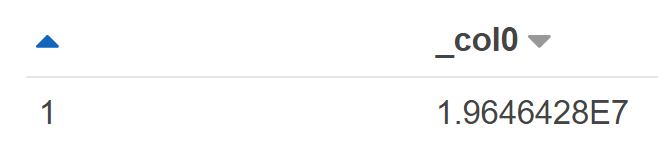

In [1]:
from IPython.display import Image
Image('Capture.PNG')

## Open ended questions

8 points
_Include the SQL and at least 1 plot in your answers to the following questions.
It's sufficient to include a plot for either the first or second question._


### 1

Pick one of the signals from Delphi's [Facebook survey](https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/fb-survey.html) that you find personally interesting.
Explain what the signal means, and use this signal to pose and answer a question using the `covid` table.

```sql
```



- Lets start with the question. 
#### Which state had the most highest occurence in traveling out of state?



- To solve for this I am focusing on the `signal` ***smoothed_wtravel_outside_state_5d***. The description for it is `Discontinued as of Wave 10, Mar 2, 2021 Estimated percentage of respondents who report traveling outside their state in the past 5 days
Earliest date available: 2020-04-06`. Another factor for choosing this signal was due to its early introduction, Wave 1, this gave me the impression that I would have a lot of observations to work with. Also, if the decscription was not enough this signal implies that these responses are an estimate of those who traveled out of their state in the past 5 days and it some sort of prep for part 2 because I would like to relate these results with Airline data. If thats possible. 
- First lets run some querys and explore. 
```sql
SELECT signal, COUNT(*) AS num_obs
FROM covid
WHERE signal = 'smoothed_wtravel_outside_state_5d'
GROUP BY signal
LIMIT 10;
```
resulted in 	
        signal	               num_obs
   1         smoothed_wtravel_outside_state_5d                       	           453079
   
- After looking at the observations I want to calculate the sample sizes per state with this signal. 

```sql
SELECT T.state, SUM(C.sample_size)AS sample_sum
FROM covid AS C, county AS T, states AS S
WHERE signal = 'smoothed_wtravel_outside_state_5d'
        AND C.geo_type='state'
        AND C.geo_value = LOWER(S.abbreviation)
        AND S.state = T.state
GROUP BY  T.State;
```

In [76]:
q1 = pd.read_csv('c32d8e53-08f8-4686-b675-96902b690093.csv')
q1_sort = q1.sort_values(by='sample_sum', ascending=False, ignore_index=True)
q1_sort

,state,sample_sum
0,Texas,1.793916e+09
1,California,4.970744e+08
2,Florida,4.384099e+08
3,Illinois,4.327649e+08
4,Georgia,4.163272e+08
5,Virginia,4.054305e+08
6,Ohio,3.815781e+08
7,Michigan,3.723057e+08
8,North Carolina,3.573273e+08
9,Pennsylvania,3.324314e+08


- Based on the above we can see that the larger states have more reponses that conclude them traveling out of state during the covid time period. I wanted to include the estimate sample population from 2018 to get an idea or comparison however it was giving me bizarre numbers so I queried a seperate table to compare to. 

```sql
SELECT state, SUM(CAST("population estimate 2018" AS INT))
FROM "covid-homework"."county"
GROUP BY state;
```

In [75]:
pop_2018 = pd.read_csv('fd507617-ae5a-4f25-89d0-18d55887392a.csv')
z = pop_2018.sort_values(by='_col1', ascending=False, ignore_index=True)
z

,state,_col1
0,California,39557045
1,Texas,28701845
2,Florida,21299325
3,New York,19542209
4,Pennsylvania,12807060
5,Illinois,12741080
6,Ohio,11689442
7,Georgia,10519475
8,North Carolina,10383620
9,Michigan,9995915


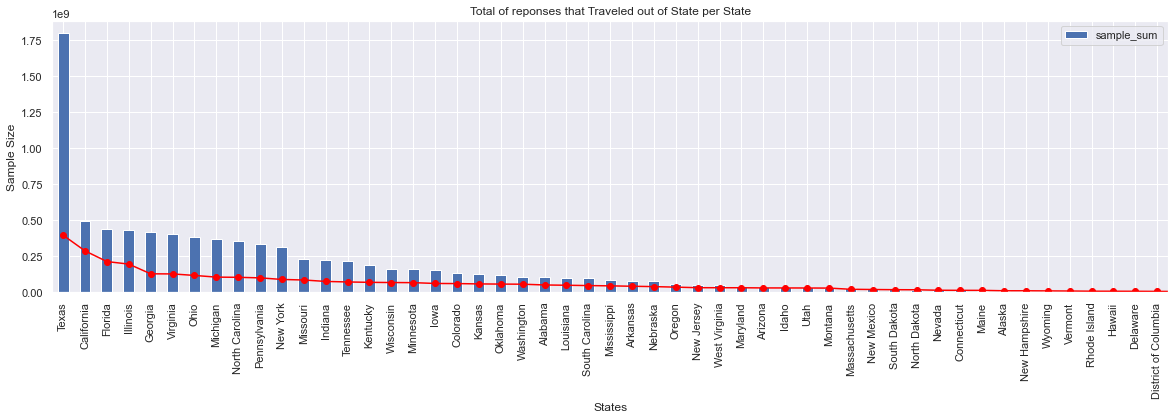

In [78]:
# I had to look at the table I made and im not sure how it equate to such large numbers
# but I'll try to figure it out later. 
# I will plot a bar chart. 
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
plt.rcParams["figure.figsize"] = (20,5)
q1_sort.plot.bar(x="state", y="sample_sum", rot=90, title="Total of reponses that Traveled out of State per State");
plt.plot(z['state'], z['_col1']*10, color='red', marker='o')
plt.xlabel('States')
plt.ylabel('Sample Size')

plot.show(block=True);

If only the line graph well graphed to its respective states this would of been a better representation to compare with. However below shows the true State corresponding to the correct population size. So comparing the two it makes sense that Cali, Flor, and Texas make the top three due to larger population sizes. This sets up my next question and relating to the next question for this assignment do these traveling rates outside of the state increase the number of covid cases and airplane passengers that flew out of state? Next I need to find data about planes and about covid cases. 

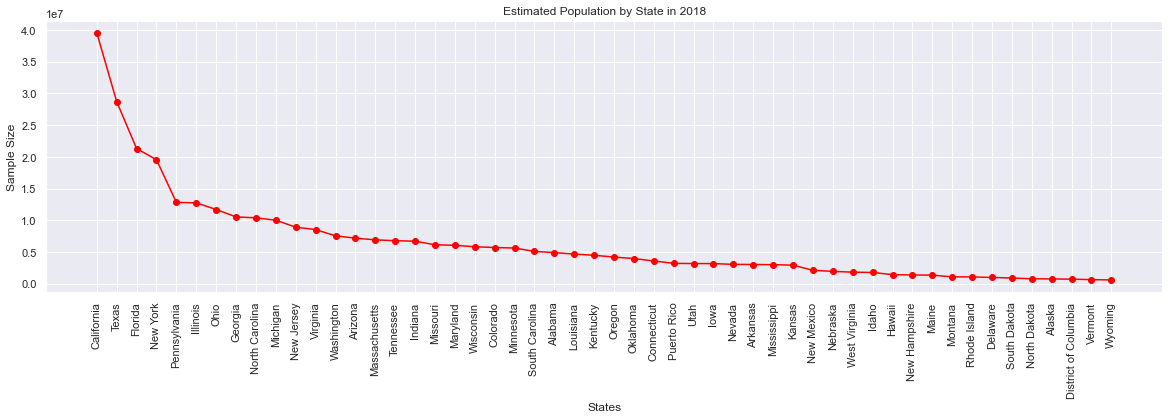

In [85]:
plt.plot(z['state'], z['_col1'], color='red', marker='o')
plt.xlabel('States')
plt.ylabel('Sample Size')
plt.xticks(rotation=90)
plt.title("Estimated Population by State in 2018")
plot.show()


### 2

Load an external table into your database and use it to ask and answer a new question by joining it with the existing tables.
For example, we could look at the relationship between political backgrounds and COVID attitudes by finding a table with votes for each party by state or county for the 2020 presidential election.

```sql
```